<h1 align="center"><code style="background-color: #8c182b;color:white;">Exploratory Data Analysis and Prediction Analysis on Maternal Smoking</code></h1> 

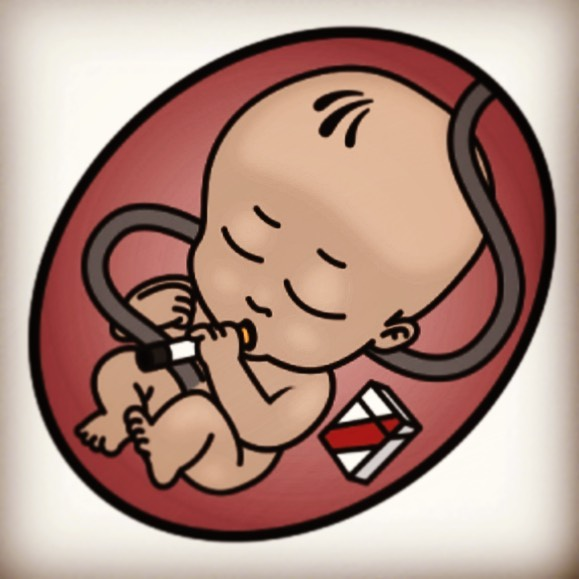

<h3><code style="background:#8c182b;color:white">Introduction                                                                                                                   </code></h3> 

Maternal smoking during pregnancy has been shown to have a negative impact on the gestation period, or the length of time a woman carries a pregnancy. Studies have consistently found that maternal smoking is associated with a shorter gestational period, meaning that the baby is born earlier than expected.
Smoking during pregnancy can also lead to an increased risk of preterm birth, which is defined as delivery before 37 weeks (270 days) of gestation. Preterm birth is a major cause of infant morbidity and mortality, and is associated with a range of long-term health problems.

Overall, it is recommended that women avoid smoking during pregnancy in order to promote a healthy gestational period and reduce the risk of adverse health outcomes for their baby.

This dataset is a subset of the Child Health and Development Study (CHDS), a long-term study conducted by the Public Health Institute in California that began in 1959 and followed a cohort of over 15,000 pregnant women and their offspring for several decades. The subset includes data on maternal smoking and other factors collected during the pregnancy, as well as birth outcomes such as birth weight and gestation. 

<h3><code style="background:#8c182b;color:white">Problem Statement                                                                                                                   </code></h3> 

The aim of this analysis is to explore if there is a relationship between maternal smoking during pregnancy and preterm birth, while considering other variables such as maternal BMI, age, race, income, marital status, parity, and birth weight.

The analysis will investigate the prevalence of maternal smoking during pregnancy in the dataset and compare the risk of preterm birth between smokers and non-smokers. It will also examine the relationship between maternal BMI and preterm birth, and whether there are differences in preterm birth rates based on maternal age, race, income, marital status, and parity.

Finally, I will find out if a predictive model can be developed to identify women at high risk of preterm birth based on maternal smoking, BMI, age, race, income, marital status, parity, and birth weight.

<h3><code style="background:#8c182b;color:white">Code Book                                                                                                                   </code></h3> 


| code|description | 
| :----------- | :----------- |
| gestation      | gestational age of the baby/babies in days (above of below normal gestation period-270 days |
| babys_weight   | weight of the baby/babies in ounces        |
| parity      | parity of the mother (whether first born or subsequent birth)       |
| mothers_education     | level of education of the mother       |
| mothers_height   | height of the mother in inches        |
| mothers_weight      | weight of the mother in pounds       |
| mothers_race   | race/ethnicity of the mother        |
| fathers_age      | age of the father in years       |
| fathers_education   | level of education of the father        |
| fathers_height      | height of the father in inche       |
| fathers_weight   | weight of the father in pounds        |
| fathers_race      | race/ethnicity of the father       |
| marital_status   | marital status of the mother        |
| total_income      | total family income       |
| mothers_age|age of the mother in years||
| smoking_status   | smoking status of the mother during pregnancy (smokes or not)        |
| quit_time      | time at which the mother quit smoking during pregnancy      |
| num_cigs_taken   | number of cigarettes smoked per day by the mother during pregnancy        |


<h3><code style="background:#8c182b;color:white">Importing Necessary Libraries for Analysis and Setting Seaborn Style                                                                                                                   </code></h3> 

In [1]:
import numpy as np    
import pandas as pd  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings; warnings.filterwarnings('ignore')

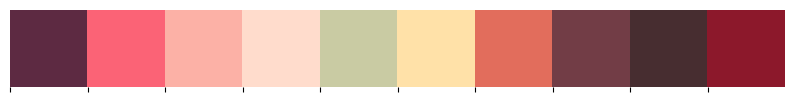

In [2]:
# Color Palette
custom_colors = ['#5d2a42','#fb6376','#fcb1a6','#ffdccc','#C9CBA3', '#FFE1A8', '#E26D5C', '#723D46', '#472D30','#8c182b']
sns.palplot(sns.color_palette(custom_colors))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)


<h3><code style="background:#8c182b;color:white">Loading Data File Into Dataframe                                                                                                                   </code></h3> 

A copy of the data will be used for this exploratory analysis. To confirm the data has been loaded and to see how the data is looking like, I will look at the first 5 and the last 5 observations using .head() and .tail() respectively.

In [3]:
data = pd.read_csv("smoking.csv")

In [4]:
smoke_df = data.copy()

In [5]:
smoke_df.head()

,id,date,gestation,weight,parity,mom.race,mom.age,mom.edu,mom.height,mom.weight,dad.race,dad.age,dad.edu,dad.height,dad.weight,marital,income,smoke,quit.time,cigs
0,15,1411,284,120,1,asian,27,5,62,100,asian,31,5,65,110,1,1,never,0,0
1,20,1499,282,113,2,white,33,5,64,135,white,38,5,70,148,1,4,never,0,0
2,100,1673,286,136,4,white,25,2,62,93,white,28,2,64,130,1,4,until_pregnancy,2,2
3,129,1562,245,132,2,black,23,1,65,140,black,23,4,71,192,1,2,never,0,0
4,142,1408,289,120,3,white,25,4,62,125,white,26,1,70,180,0,2,never,0,0


In [6]:
smoke_df.tail()

,id,date,gestation,weight,parity,mom.race,mom.age,mom.edu,mom.height,mom.weight,dad.race,dad.age,dad.edu,dad.height,dad.weight,marital,income,smoke,quit.time,cigs
605,9153,1672,275,113,0,white,27,5,60,100,white,32,4,72,190,1,4,never,0,0
606,9163,1712,265,128,1,white,24,5,67,120,white,24,5,73,170,1,3,never,0,0
607,9213,1672,291,130,4,white,30,2,65,150,white,30,5,70,180,1,3,now,1,2
608,9229,1680,281,125,0,white,21,4,65,110,white,27,5,71,165,1,1,never,0,0
609,9263,1668,297,117,4,white,38,4,65,129,white,34,1,68,172,1,6,never,0,0


#### Exploring the nature of the dataset

In [7]:
print(f'The data has {smoke_df.shape[0]} rows and {smoke_df.shape[1]} columns.') 

The data has 610 rows and 20 columns.


In [8]:
print(f'The size of the data is {smoke_df.size}.') 

The size of the data is 12200.


In [9]:
print(f'The data consists of:\n\n{smoke_df.dtypes}') 

The data consists of:

id             int64
date           int64
gestation      int64
weight         int64
parity         int64
mom.race      object
mom.age        int64
mom.edu        int64
mom.height     int64
mom.weight     int64
dad.race      object
dad.age        int64
dad.edu        int64
dad.height     int64
dad.weight     int64
marital        int64
income         int64
smoke         object
quit.time      int64
cigs           int64
dtype: object


<h3><code style="background:#8c182b;color:white">Data Cleaning and Transformation                                                                                                                  </code></h3> 

#### Dropping columns that will not be needed in this analysis

In [10]:
smoke_df["id"].nunique()

610

`id` column seems to be unnecessary as all the rows are unique and don't need any identification. Also I cannot seem to figure out the format of the `date` column, plus it won't be necessary for my analysis. I will be dropping the `id` and `date` columns.`

In [11]:
smoke_df.drop(["id", "date"], axis=1, inplace=True)

#### Renaming Columns
For easy parsing and reading of the columns

In [12]:
smoke_df.rename(columns={"weight":"babys_weight",
                 "mom.race": "mom_race",
                 "mom.height": "mothers_height",
                 "mom.age": "mothers_age",
                 "mom.race": "mothers_race",
                 "mom.edu": "mothers_education",
                 "mom.weight": "mothers_weight",
                 "dad.race": "fathers_race",
                 "dad.age": "fathers_age",
                 "dad.edu": "fathers_education",
                 "dad.height": "fathers_height",
                 "dad.weight": "fathers_weight",
                 "marital": "marital_status",
                 "income": "total_income",
                 "quit.time": "quit_time",
                 "cigs": "num_cigs_taken"}, inplace=True)

This data exploration will concentrate on the mother and her variables, therefore all fathers' variables will be dropped to establish a focus in the dataframe.

In [13]:
smoke_df.drop(["fathers_race","fathers_age","fathers_education","fathers_height","fathers_weight"], axis=1, inplace=True)

#### Replacing categorical features with numerical features
This is so these columns can be analyzed in univariate and multivariate analysis as well as for predictive analysis with machine learning

In [14]:
#smoke column
smoke_df['smoke'] = smoke_df['smoke'].replace({
    'never': 0,
    'now': 1,
    'once_not_now': 2,
    'until_pregnancy': 2
})

#mothers_race column
smoke_df['mothers_race'] = smoke_df['mothers_race'].replace({
    'white': 0,
    'black': 1,
    'asian': 2,
    'mexican': 3,
    'mixed': 4
})


#### Creating a BMI column to answer the BMI questions

In [15]:
smoke_df['mothers_bmi'] = round(((smoke_df['mothers_weight'] / 2.205) / (smoke_df['mothers_height'] / 39.37)** 2),2)

In [16]:
smoke_df

,gestation,babys_weight,parity,mothers_race,mothers_age,mothers_education,mothers_height,mothers_weight,marital_status,total_income,smoke,quit_time,num_cigs_taken,mothers_bmi
0,284,120,1,2,27,5,62,100,1,1,0,0,0,18.29
1,282,113,2,0,33,5,64,135,1,4,0,0,0,23.17
2,286,136,4,0,25,2,62,93,1,4,2,2,2,17.01
3,245,132,2,1,23,1,65,140,1,2,0,0,0,23.29
4,289,120,3,0,25,4,62,125,0,2,0,0,0,22.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,275,113,0,0,27,5,60,100,1,4,0,0,0,19.53
606,265,128,1,0,24,5,67,120,1,3,0,0,0,18.79
607,291,130,4,0,30,2,65,150,1,3,1,1,2,24.96
608,281,125,0,0,21,4,65,110,1,1,0,0,0,18.30


In [17]:
def data_exploration(df):
    """
    This function takes a pandas dataframe as input and performs some basic data exploration and analysis.

    Parameters:
    df (pandas.DataFrame): The dataframe to be explored.

    Returns:
    None
    """
    print("Data shape: ", df.shape)
    print("\nData info: ")
    print(df.info())
    print("\nMissing values: ")
    print(df.isnull().sum())
    print("\nUnique values: ")
    for col in df.columns:
        print(col, ":", df[col].nunique())

In [18]:
x = data_exploration(smoke_df)
x

Data shape:  (610, 14)

Data info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gestation          610 non-null    int64  
 1   babys_weight       610 non-null    int64  
 2   parity             610 non-null    int64  
 3   mothers_race       610 non-null    int64  
 4   mothers_age        610 non-null    int64  
 5   mothers_education  610 non-null    int64  
 6   mothers_height     610 non-null    int64  
 7   mothers_weight     610 non-null    int64  
 8   marital_status     610 non-null    int64  
 9   total_income       610 non-null    int64  
 10  smoke              610 non-null    int64  
 11  quit_time          610 non-null    int64  
 12  num_cigs_taken     610 non-null    int64  
 13  mothers_bmi        610 non-null    float64
dtypes: float64(1), int64(13)
memory usage: 66.8 KB
None

Missing values: 
gestation       

<h3><code style="background:#8c182b;color:white">Univariate Analysis                                                                                                                  </code></h3> 

Univariate analysis focuses on analyzing a single variable at a time. In univariate analysis, the distribution, central tendency, and spread of the variables are examined. I will look at the summary statistics and the distribution of the vaules in my data.

In [19]:
smoke_df.describe()

,gestation,babys_weight,parity,mothers_race,mothers_age,mothers_education,mothers_height,mothers_weight,marital_status,total_income,smoke,quit_time,num_cigs_taken,mothers_bmi
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,278.759016,119.290164,2.003279,0.473770,27.537705,2.937705,64.100000,128.850820,1.016393,3.836066,0.721311,1.039344,1.777049,22.033721
std,15.893301,18.320072,1.916137,0.884161,5.811437,1.392941,2.582911,20.461323,0.213794,2.297856,0.754432,1.631512,2.173765,3.223161
min,148.000000,55.000000,0.000000,0.000000,15.000000,0.000000,54.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.660000
25%,272.250000,108.250000,1.000000,0.000000,23.000000,2.000000,62.000000,115.000000,1.000000,2.000000,0.000000,0.000000,0.000000,19.930000
50%,280.000000,120.000000,2.000000,0.000000,27.000000,2.000000,64.000000,125.000000,1.000000,3.000000,1.000000,1.000000,1.000000,21.300000
75%,288.000000,131.000000,3.000000,1.000000,31.000000,4.000000,66.000000,140.000000,1.000000,6.000000,1.000000,1.000000,3.000000,23.395000
max,338.000000,174.000000,11.000000,4.000000,43.000000,5.000000,72.000000,220.000000,5.000000,9.000000,2.000000,9.000000,9.000000,38.960000


- The dataset contains information on 610 births, including gestation time, baby's weight, parity, mother's race, age, education, height, weight, marital status, total income, smoking habits, and mother's BMI.  

- The average gestation time is 278.76 days, which is roughly equal to 39 weeks and 5 days.  

- The average weight of the baby at birth is 119.29 pounds, and the range of weights is between 55 and 174 pounds.
- The average parity, which is the number of times a woman has given birth, is 2.0.  

- The majority of mothers in the dataset are of race 0, which represents White mothers.  

- The average age of the mothers is 27.54 years, with a minimum age of 15 years and a maximum age of 43 years.
- The average education level of the mothers is 2.94, which represents some college education.  

- The average height of the mothers is 64.10 inches, and the range of heights is between 54 and 72 inches.  

- The average weight of the mothers is 128.85 pounds, with a minimum weight of 87 pounds and a maximum weight of 220 pounds.
- The majority of mothers in the dataset are married (1.02).  

- The average total income is 3.84, which represents a moderate income.   

- About 72% of mothers in the dataset smoke during pregnancy, with an average of 1.04 cigarettes per day.   

- The average quit time for mothers who smoke during pregnancy is 1.03, which represents that they quit smoking during the first trimester.  

- The average BMI of the mothers is 22.03, which is within the healthy weight range.

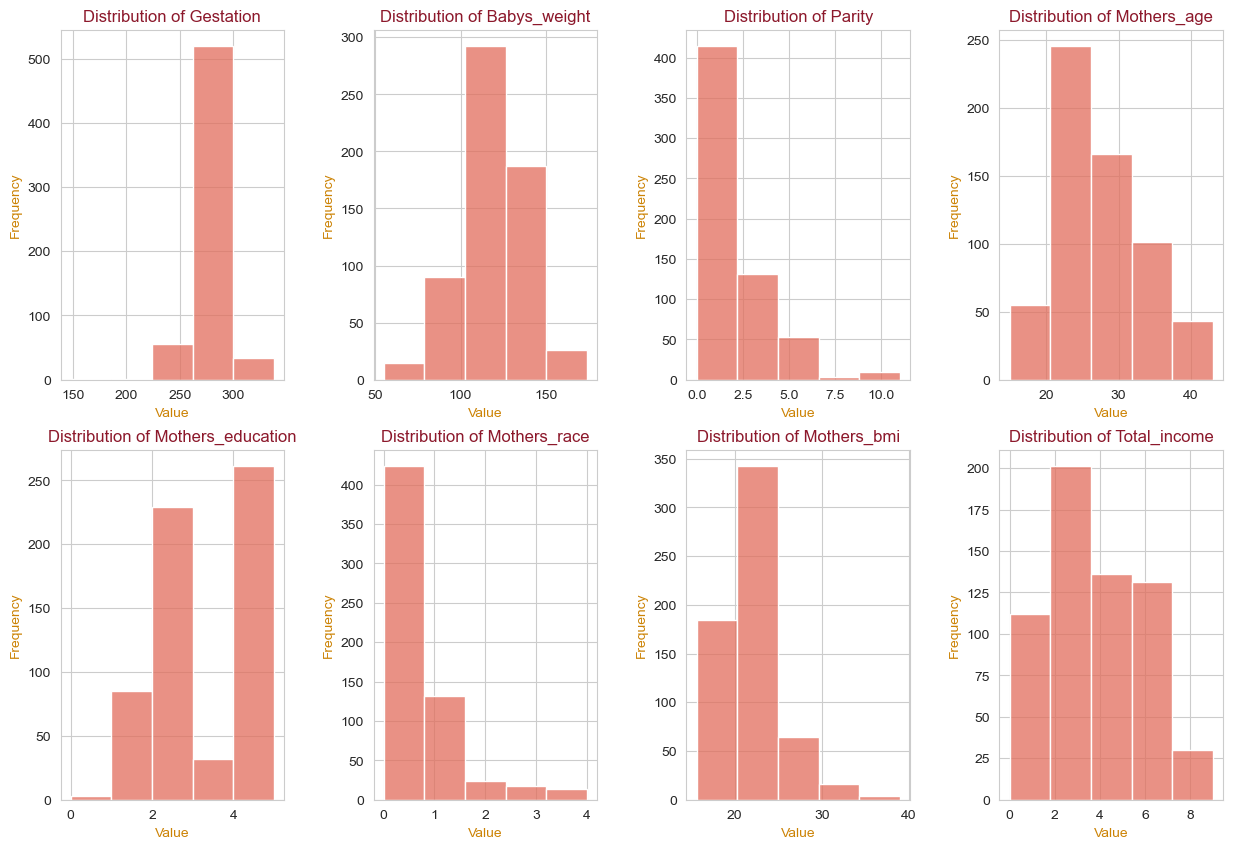

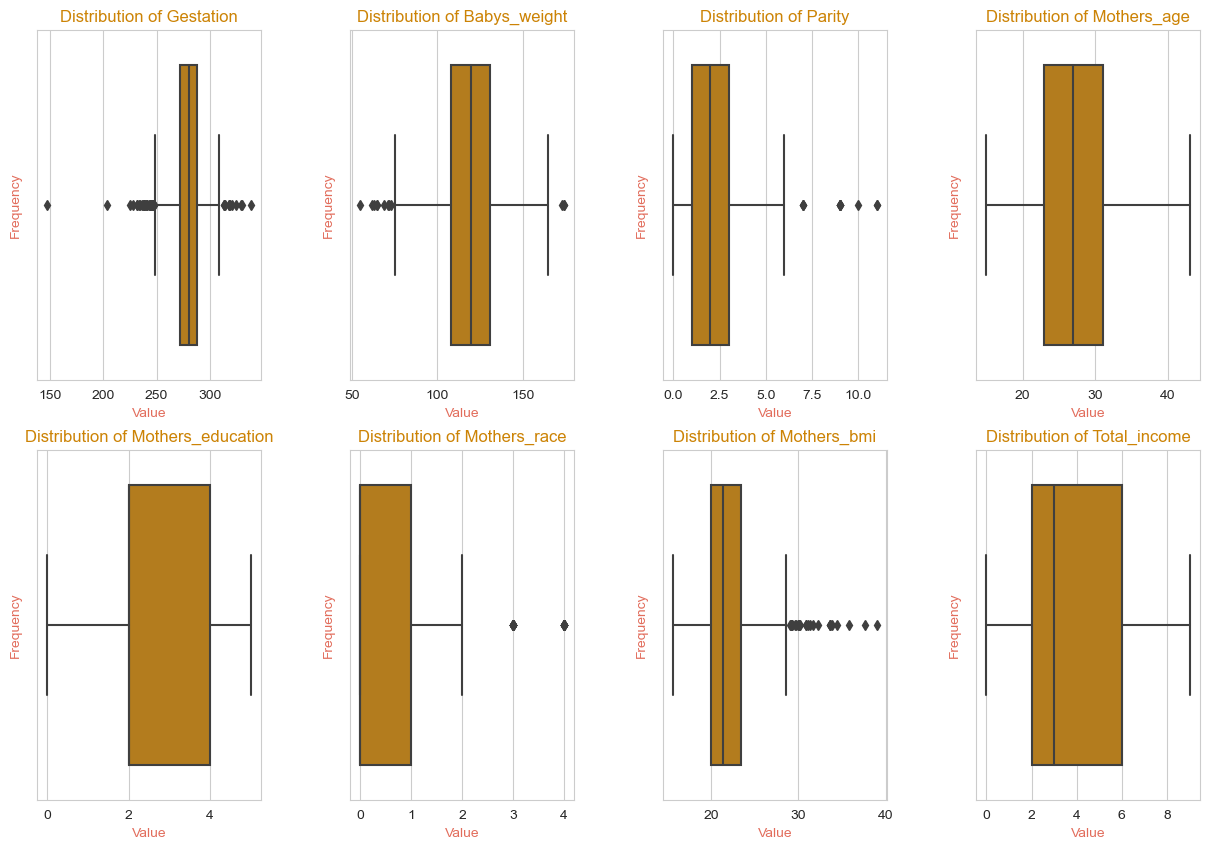

In [20]:
def plot_histograms(data):
    fig, axs = plt.subplots(2, 4, figsize=(15, 10))
    plt.subplots_adjust(wspace=0.4)

    for i, col in enumerate(['gestation', 'babys_weight','parity', 'mothers_age', 'mothers_education', 'mothers_race', 'mothers_bmi', 'total_income']):
        sns.histplot(data=data, x=col, bins=5, ax=axs[i//4, i%4], color= '#E26D5C')
        axs[i//4, i%4].set_title(f'Distribution of {col.capitalize()}', color="#8c182b")
        axs[i//4, i%4].set_xlabel('Value',color='#cc8305')
        axs[i//4, i%4].set_ylabel('Frequency',color='#cc8305')

    plt.show()

plot_histograms(smoke_df)


def plot_boxplots(data):
    fig, axs = plt.subplots(2, 4, figsize=(15, 10))
    plt.subplots_adjust(wspace=0.4)

    for i, col in enumerate(['gestation', 'babys_weight','parity', 'mothers_age', 'mothers_education', 'mothers_race', 'mothers_bmi', 'total_income']):
        sns.boxplot(data=data, x=col, ax=axs[i//4, i%4], color= '#cc8305')
        axs[i//4, i%4].set_title(f'Distribution of {col.capitalize()}', color='#cc8305')
        axs[i//4, i%4].set_xlabel('Value', color='#E26D5C')
        axs[i//4, i%4].set_ylabel('Frequency',color='#E26D5C')

    plt.show()

plot_boxplots(smoke_df)


The distribution seems to be good enough. 
`gestation` has only 0 and 1 as values hence the distribution and spread are indicative of this.
`babys_weight`,`mothers_age` and `total_income` are slightly off the normal distribution and have little to no spread.
`mothers_education` is the only column that is left-skewed but has no outliers.
`mothers_race`, `mothers_bmi` and `parity` are all right_skewed with a number of outliers.

In [21]:
smoke_df['smoke'].value_counts()

0    282
1    216
2    112
Name: smoke, dtype: int64

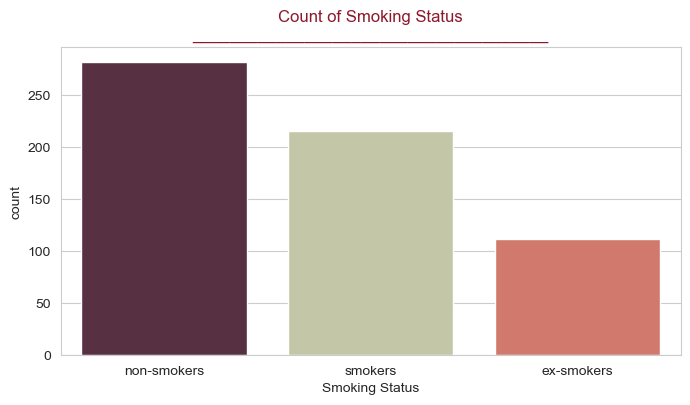

In [22]:
plt.figure(figsize=(8, 4))
sns.countplot(x=smoke_df['smoke'], palette=['#5d2a42','#C9CBA3','#E26D5C'])
plt.xticks([0,1,2],['non-smokers','smokers','ex-smokers'])
plt.xlabel('Smoking Status')
plt.title("Count of Smoking Status\n______________________________________",color = '#8c182b')
plt.show()

The data had 282 non-smokers, 216 smokers and 112 ex-smokers.

Since our objective is to know if smoking influences pre-term births, `gestation` is going to be the target column where it gives 2 values 0 (means full-term) and 1 (means pre-term)

In [23]:
smoke_df['gestation'] = np.where(smoke_df['gestation'] >= 270, 0, 1)

In [24]:
smoke_df['gestation'].value_counts()

0    493
1    117
Name: gestation, dtype: int64

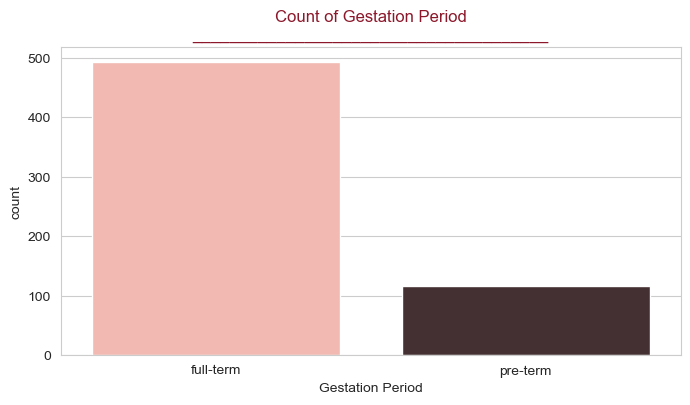

In [25]:
plt.figure(figsize=(8, 4))
sns.countplot(x=smoke_df['gestation'], palette=['#fcb1a6','#472D30'])
plt.xticks([0,1],['full-term','pre-term'])
plt.xlabel('Gestation Period')
plt.title("Count of Gestation Period\n______________________________________",color = '#8c182b')
plt.show()

The data has 493 births with value 0 (full-term) and 117 births with value 1 (pre-term). The dataset is an imbalanced one so I will have to make use of Class Weighting during modelling. Class weighting is a technique used to address imbalanced datasets in which the minority class has fewer samples than the majority class.

<h3><code style="background:#8c182b;color:white">Bivariate Analysis                                                                                                                  </code></h3> 

In this analysis, I want to find the relationship between gestation and othe features in the data. The relationship between smokers and non smokers and other variables will also be considered. These relationships will described in a graphical bar charts which makes it easier to see the the changes in influence.

To better understand understand this bivariate analysis and how the categorical and/or ordinal columns such as age, education are coded, here is a list of such codes:  


- mothers_race - 0-5=white, 6=mexican, 7=black, 8=asian, 9=mix  


- mothers_education 0 = less than 8th grade, 1 = 8th to 12th grade, did not graduate high school, 2 = high school graduate, no other schooling, 3 = high school graduate + trade school, 4 = high school graduate + some college, 5 = college graduate, 6,7 = trade school but unclear if graduated from high school, 9 = unknown  


- income: family yearly income in 2500 increments. 0 = under 2500, 1 = 2500-4999, …, 9 = 15000+. 98=unknown


In [26]:
smoke_df.columns

Index(['gestation', 'babys_weight', 'parity', 'mothers_race', 'mothers_age',
       'mothers_education', 'mothers_height', 'mothers_weight',
       'marital_status', 'total_income', 'smoke', 'quit_time',
       'num_cigs_taken', 'mothers_bmi'],
      dtype='object')

I realized that, there will be no need to assess for height and weight of mothers since their bmis' have been calculated for. Thus moving forward `mothers_weight` and `mothers_height` will not be included in the analysis.

In [27]:
smoke_df.drop(['mothers_weight','mothers_height'], axis=1, inplace=True)

#### Relationship Between Gestation Period and Baby's Weight, Parity, Mother's Age, Education, Race, BMI, and Income

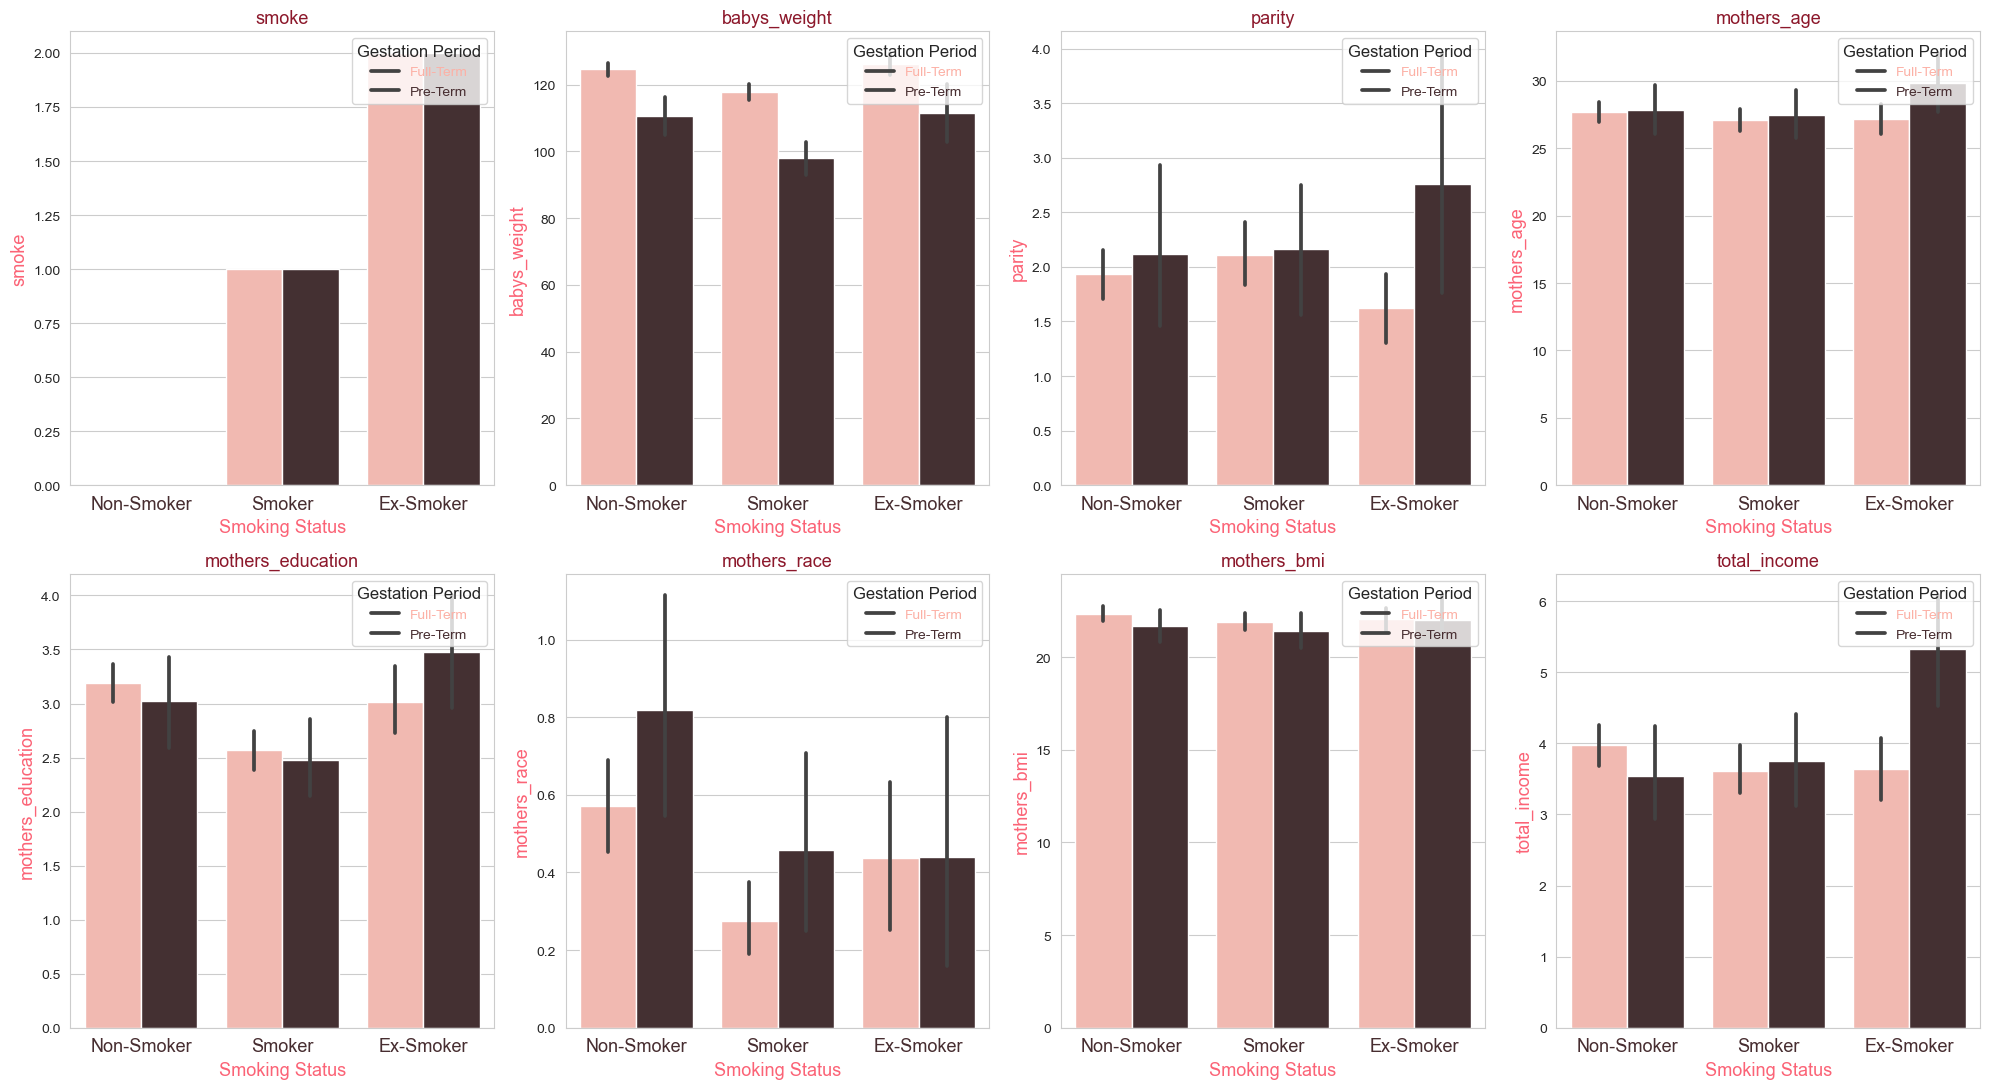

In [28]:
# Create the subplots grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 11))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Loop over the columns and plot them as subplots
for i, col in enumerate(['smoke', 'babys_weight', 'parity', 'mothers_age', 'mothers_education', 'mothers_race', 'mothers_bmi', 'total_income']):
    # Create the subplot
    sns.barplot(x='smoke', y=col, hue='gestation', data=smoke_df, ax=axes[i], palette=['#fcb1a6','#472D30'])
    
    # Set the subplot title and axis labels
    axes[i].set_title(col, color='#8c182b',fontsize=13)
    axes[i].set_xlabel('Smoking Status', color='#fb6376',fontsize=13)
    axes[i].set_xticklabels(['Non-Smoker', 'Smoker', 'Ex-Smoker'], color='#472D30',fontsize=13)
    axes[i].set_ylabel(col,color='#fb6376',fontsize=13)
    # Set the legend title and labels
    axes[i].legend(title='Gestation Period',labelcolor=['#fcb1a6','#472D30'], labels=['Full-Term', 'Pre-Term'], title_fontsize=12, fontsize=10, loc='upper right')

# Set the tight layout
fig.tight_layout()

# Show the plot
plt.show()


With `smoke` smokers, non-smokers and ex-smokers had the same number of pre-terms and full-terms.  

In `babys_weight` full-term births were above pre-term for all smoking statuses.  

`parity` was the opposite of `babys_weight`, mothers whether smokers, ex-smokers or non-smokers had a higher pre-term birth rate indicating that if a mother is on a subsequent pregnancy the gestation gets shorter.  

In `mothers_age` pre-term births were slightly higher than full-terms for all smoking status.  

In `mothers_education`, ex-smokers were highly educated followed by non-smokers then smokers. Interestingly, pre-terms were higher in ex-smokers.  

In `mothers_race`, there was a little bias because there were more whites than other races.  

In `mothers_bmi`, bmi were ralatively equal for all statuses and gestation was not affected as full-terms births were slightly higher than pre-terms.  

In `total_income`, ex-smokers who earned more had a higher pre-term rate. Aside that income was quite similar accross statuses.

#### Relationship Between Smoking Period and Baby's Weight, Parity, Mother's Age, Education, Race, BMI, and Income

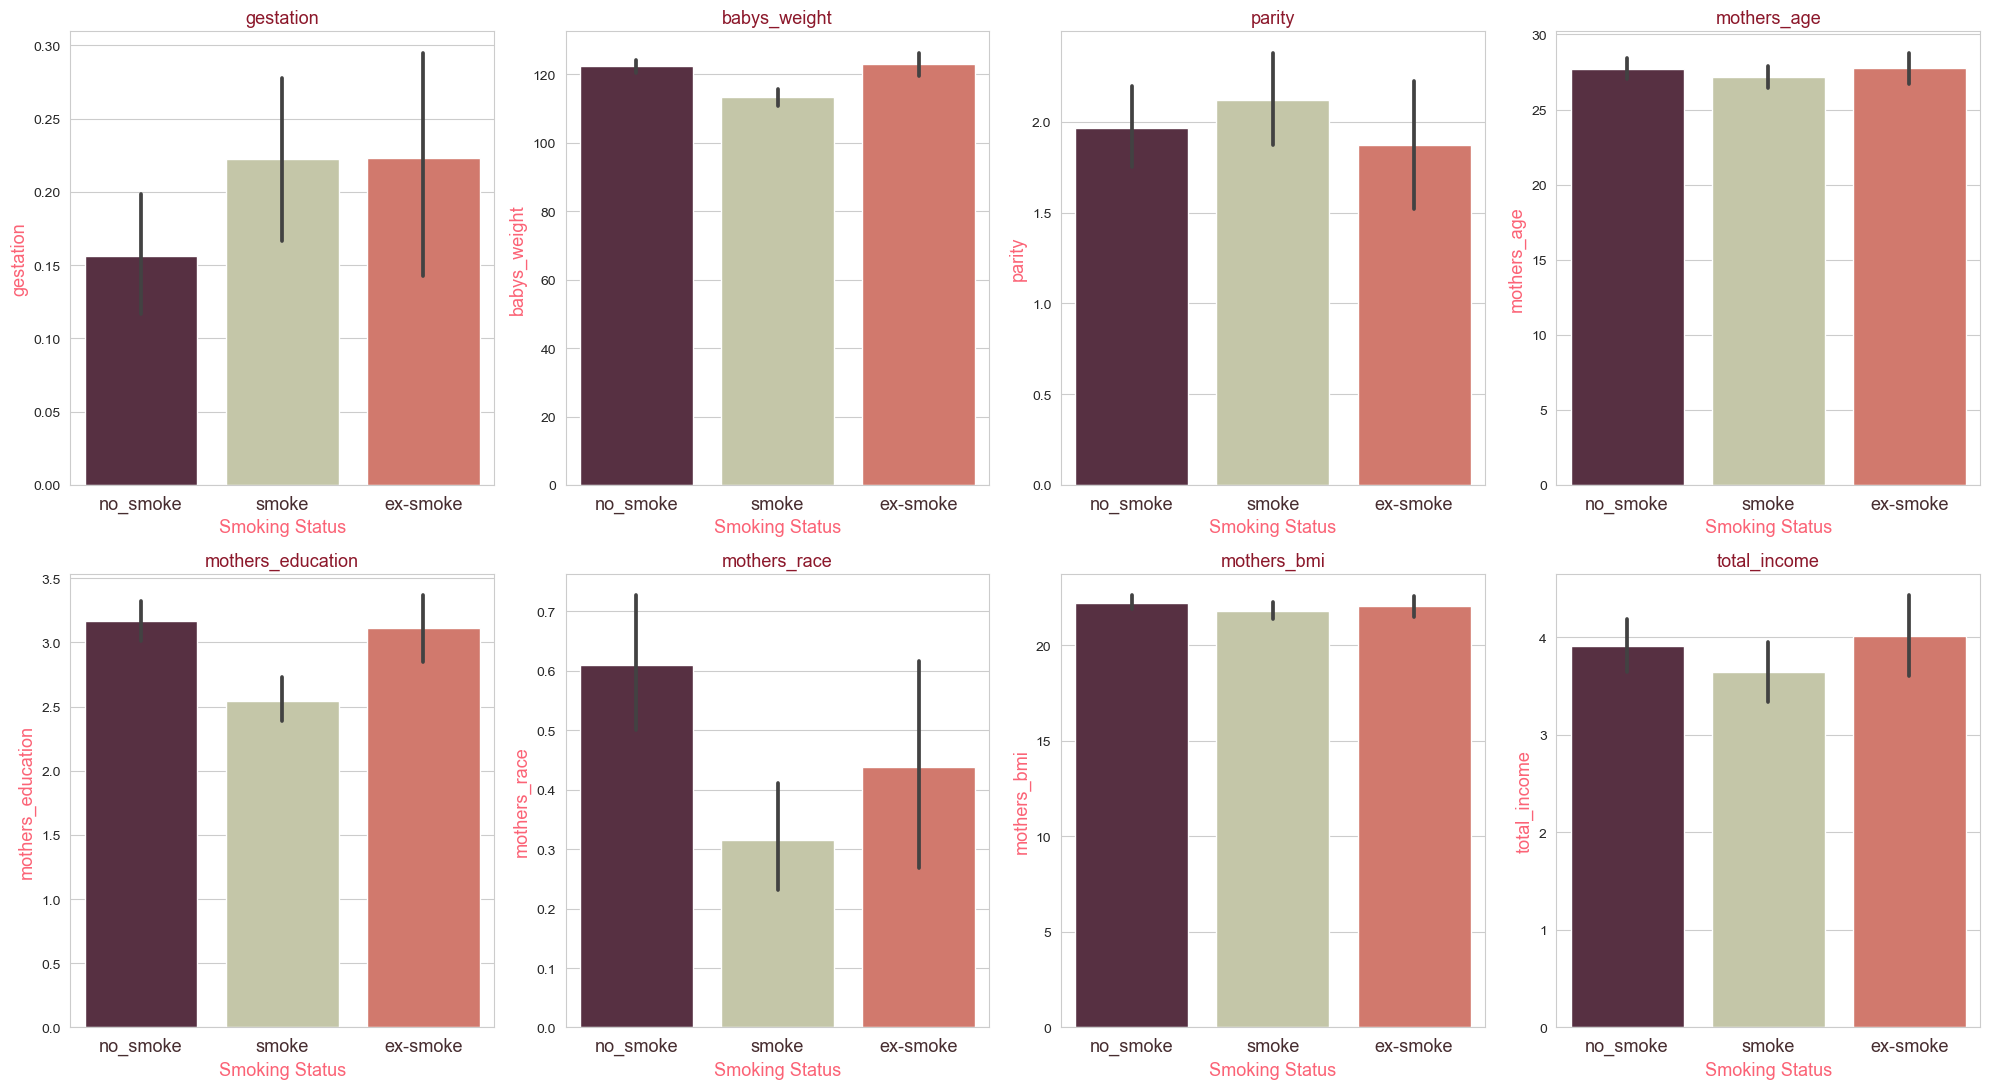

In [29]:
# Create the subplots grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 11))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Loop over the columns and plot them as subplots
for i, col in enumerate(['gestation', 'babys_weight','parity', 'mothers_age', 'mothers_education', 'mothers_race','mothers_bmi', 'total_income']):
    # Create the subplot
    sns.barplot(x='smoke', y=col, data=smoke_df, ax=axes[i], palette=['#5d2a42','#C9CBA3','#E26D5C'])
    
    # Set the subplot title and axis labels
    axes[i].set_title(col,color='#8c182b',fontsize=13)
    axes[i].set_xlabel('Smoking Status', color='#fb6376',fontsize=13)
    axes[i].set_xticks([0,1,2],['no_smoke','smoke','ex-smoke'], color='#472D30',fontsize=13)
    axes[i].set_ylabel(col,color='#fb6376',fontsize=13)
# Set the tight layout
fig.tight_layout()

# Show the plot
plt.show()


With `gestation` smokers and ex-smokers had a higher number of mothers being full-term than non-smokers.  

In `babys_weight` smokers had a lower birth weight, while smokers and ex-smokers had relatively high birth weights, indicating that smoking does have a relationship with the weight of the baby.  

In `parity` smokers were more likely to be given birth to their subsequent children whilst more ex-smokers were now on their firt birth.  
In `mothers_age`, all mothers were peaked around the same age.  

In `mothers_education`non-smokers were slightly more educated than ex-smkers and highly more educated than smokers.  

In `mothers_bmi`was also relatively equal across all statuses.  

In `total_income`ex-smokers tend to make more money than the others.

<h3><code style="background:#8c182b;color:white">Multivariate Analysis                                                                                                                  </code></h3> 

Multivariate analysis involves examining the relationship between multiple variables. It helps to identify patterns and trends, and understand how different variables are related to each other. In this analysis, I will be making use of a correlation matrix to establish the relationhip between the variables.  
I will be dividing the variables into two, situation features and mothers features to know if mothers' attributes have a stronger relationship with pre-term birth or the situation of the mother such as her income or smoking habits are more related to pre-term births.

In [30]:
smoke_df.columns

Index(['gestation', 'babys_weight', 'parity', 'mothers_race', 'mothers_age',
       'mothers_education', 'marital_status', 'total_income', 'smoke',
       'quit_time', 'num_cigs_taken', 'mothers_bmi'],
      dtype='object')

In [31]:
situation_features = ['babys_weight', 'parity','marital_status', 'total_income', 'smoke','quit_time','num_cigs_taken']
mothers_features = ['mothers_race', 'mothers_age','mothers_education','mothers_bmi']

In [32]:
situation_features.append('gestation')
mothers_features.append('gestation')

In [33]:
smoke_df[situation_features]

,babys_weight,parity,marital_status,total_income,smoke,quit_time,num_cigs_taken,gestation
0,120,1,1,1,0,0,0,0
1,113,2,1,4,0,0,0,0
2,136,4,1,4,2,2,2,0
3,132,2,1,2,0,0,0,1
4,120,3,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...
605,113,0,1,4,0,0,0,0
606,128,1,1,3,0,0,0,1
607,130,4,1,3,1,1,2,0
608,125,0,1,1,0,0,0,0


In [34]:
corr_sit = smoke_df[situation_features].corr()
corr_ma = smoke_df[mothers_features].corr()

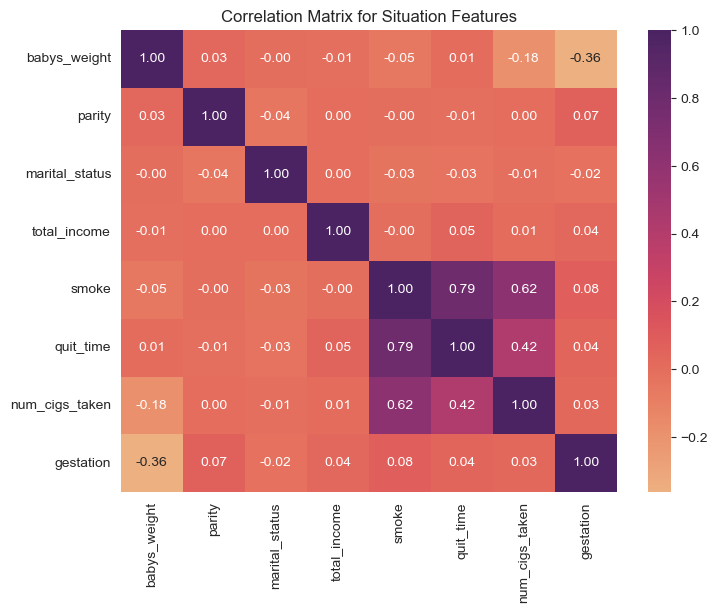

In [40]:
corr_sit

plt.figure(figsize=(8, 6))
sns.heatmap(corr_sit, cmap='flare', annot=True, fmt='.2f')
plt.title('Correlation Matrix for Situation Features')
plt.show()

`babys_weight`: Negative correlation with gestation, as gestation increases, baby's weight tends to decrease.  

`parity`: Small positive correlation with gestation, women with more pregnancies may have longer gestational periods. 

`marital_status`: Little to no correlation with gestation, marriage does not impact the length of pregnancy.  

`total_income`: Little to no correlation with gestation, income level does not impact pregnancy length.  

`smoke`: Positive correlation with gestation, smoking is associated with longer gestational periods.  

`quit_time`: Positive correlation with gestation, women who quit smoking earlier tend to have longer pregnancies.  

`num_cigs_taken` per day during pregnancy: Little to no correlation with gestation, amount of cigarettes smoked does not impact pregnancy length.

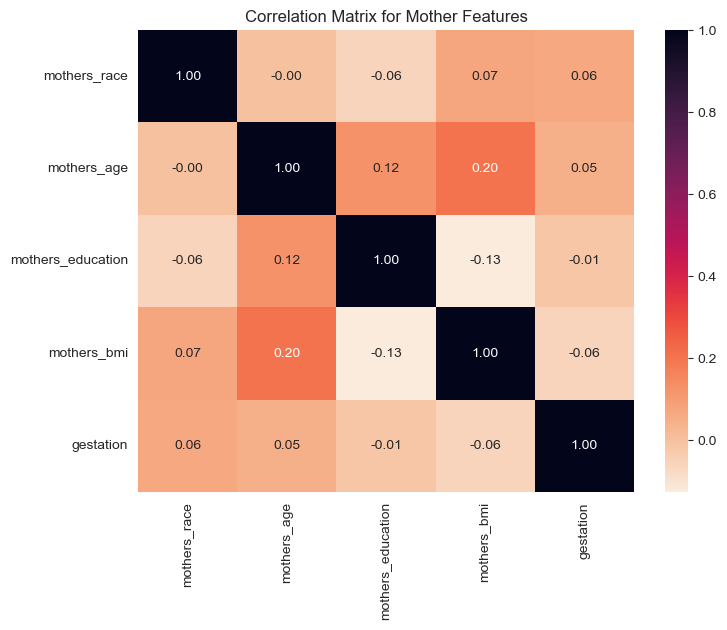

In [51]:
corr_ma

plt.figure(figsize=(8, 6))
sns.heatmap(corr_ma, cmap='rocket_r', annot=True, fmt='.2f')
plt.title('Correlation Matrix for Mother Features')
plt.show()


`mothers_race`: Little to no correlation with gestation, race does not impact pregnancy length.  

`mothers_age`: Little positive correlation with gestation, older mothers may have slightly longer pregnancies.  

`mothers_education`: Little to no correlation with gestation, education level does not impact pregnancy length.  

`mothers_bmi`: Little to no correlation with gestation, BMI does not impact pregnancy length.  

`gestation`: Positive correlation with gestation, as expected since gestation is the target variable.

<h3><code style="background:#8c182b;color:white">Machine Learning Analysis                                                                                                                  </code></h3> 

I selected a few appropriate algorithms or models that could be used to to identify women at high risk of preterm birth based on the data and its evaluation. These are random forest,logistic regression, K-Nearest Neighbors Algorithm, support vector machine, and Neural Networks - Multi Layer Perception.  

### Data Pre-processing

After, figuring out what the feature variables are from the correlation matrix, these feature variables are passed into lists that will be used for modeling the data. 
`prediction_rel` refers to the features variables that were identified earlier to have some amount of significant relationship with the target variable.
`prediction_all` refers to all the columns or features in the data.

In [52]:
prediction_rel = ['babys_weight', 'parity', 'mothers_race', 'mothers_age',
                   'total_income', 'smoke', 'quit_time','num_cigs_taken']

prediction_all = ['babys_weight', 'parity', 'mothers_race', 'mothers_age',
                  'mothers_education','marital_status', 'total_income', 
                  'smoke', 'quit_time','num_cigs_taken', 'mothers_bmi']

This code splits the dataset into two parts: "train" and "test" with 75% and 25% of the data respectively. The random_state parameter is set to 42 to ensure that the same data is selected for each run of the code. The train data is used to train the model, and the test data is used to evaluate the performance of the trained model.

In [53]:
train, test = train_test_split(smoke_df, test_size=0.25, random_state=42)

The first set of lines define the training and testing data, where only a subset of features (prediction_rel) are used to predict gestation. The second set of lines defines the same training and testing data, but using all available features (prediction_all) to predict gestation.

In [54]:
train_x = train[prediction_rel]
train_y = train['gestation']
test_x = test[prediction_rel]
test_y = test['gestation']

x_train = train[prediction_all]
y_train = train['gestation']
x_test = test[prediction_all]
y_test = test['gestation']

### Modelling With Related Features

#### Random Forest

Here I will be performing a hyperparameter tuning for a Random Forest Classifier using the RandomizedSearchCV function from scikit-learn. It creates a dictionary param_grid with various hyperparameters to search through using random sampling, and sets a scoring metric for evaluation. It fits the model on train_x and train_y data, using a 5-fold cross-validation approach. The best hyperparameters are selected based on the scoring metric and the fitted model is stored in the grid_search variable.

In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced')

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

class_weights = {0: 1, 1: 10}

grid_search = RandomizedSearchCV(model, param_distributions=param_grid, cv=5, n_iter=10, scoring='f1_weighted', random_state=42)
grid_search.fit(train_x, train_y)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   param_distributions={'max_depth': [5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42, scoring='f1_weighted')

Best hyperparameters: {'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'ball_tree'}
Confusion matrix:
 [[116   7]
 [ 26   4]]
Precision score: 0.36363636363636365
Recall score: 0.13333333333333333
Accuracy score: 0.78


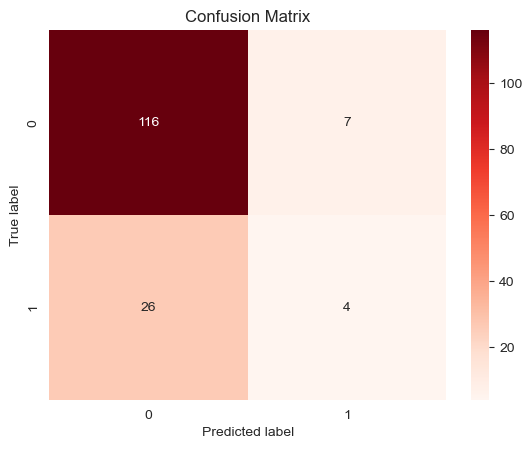

In [59]:
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(test_x)
cm = confusion_matrix(test_y, predictions)
precision = precision_score(test_y, predictions)
recall = recall_score(test_y, predictions)
accuracy = accuracy_score(test_y, predictions)
print("Confusion matrix:\n", cm)
print("Precision score:", precision)
print("Recall score:", recall)
print("Accuracy score: {:.2f}".format(accuracy))


sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

The best hyperparameters for the model were found to be n_estimators=300, min_samples_split=5, min_samples_leaf=1, and max_depth=10. The confusion matrix shows the number of true positive (116), false positive (7), false negative (26), and true negative (4) predictions.

However, based on the precision score of 0.36 and recall score of 0.13, it indicates that the model's performance is poor in predicting the positive class. Therefore, the model may not be a good predictor for the given problem.

#### K-Nearest Neighbors Algorithm 

In [60]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}


class_weights = {0: 1, 1: 10}

grid_search = RandomizedSearchCV(model, param_distributions=param_grid, cv=5, n_iter=10, scoring='f1_weighted', random_state=42)
grid_search.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [3, 5, 10],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='f1_weighted')

Best hyperparameters: {'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'ball_tree'}
Confusion matrix:
 [[116   7]
 [ 26   4]]
Precision score: 0.36
Recall score: 0.13
Accuracy score: 0.78


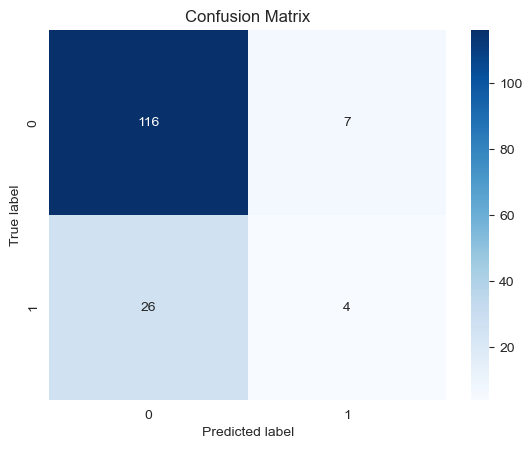

In [61]:
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(test_x)
cm = confusion_matrix(test_y, predictions)
precision = precision_score(test_y, predictions)
recall = recall_score(test_y, predictions)
accuracy = accuracy_score(test_y, predictions)
print("Confusion matrix:\n", cm)
print("Precision score: %.2f" % precision)
print("Recall score: %.2f" % recall)
print("Accuracy score: %.2f" % accuracy)


sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

The precision score is low at 0.36, indicating that the model makes a high number of false positive predictions. The recall score is also low at 0.13, indicating that the model misses many positive cases. Finally, the accuracy score is moderate at 0.78, which means that the model is correct in its predictions for about 78% of the cases. Overall, the model's performance is not ideal and could potentially be improved.

#### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')


param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': ['balanced', None]
}

class_weights = {0: 1, 1: 10}

grid_search = RandomizedSearchCV(model, param_distributions=param_grid, cv=5, n_iter=10, scoring='f1_weighted', random_state=42)
grid_search.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'class_weight': ['balanced', None],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='f1_weighted')

Best hyperparameters: {'solver': 'sag', 'penalty': 'l2', 'class_weight': None, 'C': 1}
Confusion matrix:
 [[120   3]
 [ 26   4]]
Precision score: 0.57
Recall score: 0.13
Accuracy score: 0.81


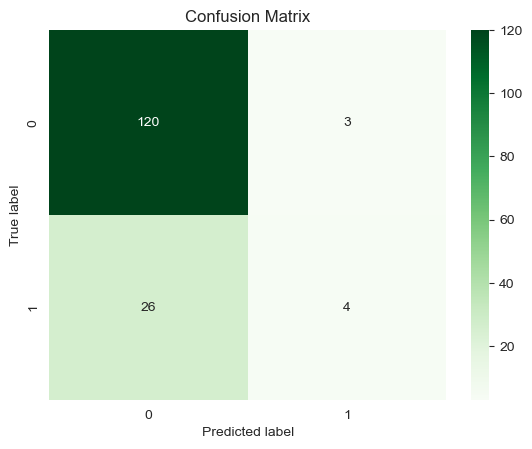

In [63]:
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(test_x)
cm = confusion_matrix(test_y, predictions)
precision = precision_score(test_y, predictions)
recall = recall_score(test_y, predictions)
accuracy = accuracy_score(test_y, predictions)
print("Confusion matrix:\n", cm)
print("Precision score: %.2f" % precision)
print("Recall score: %.2f" % recall)
print("Accuracy score: %.2f" % accuracy)


sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

The best hyperparameters for the logistic regression model are: solver = 'sag', penalty = 'l2', class_weight = None, and C = 1. The confusion matrix shows that the model correctly predicted 120 true negatives and 4 true positives, but misclassified 26 false negatives and 3 false positives. The precision score is 0.57, recall score is 0.13, and accuracy score is 0.81. Overall, the model has a high accuracy but low precision and recall, indicating that it may not be the best predictor for the given dataset.

#### Neural Networks - Multi Layer Perception


In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.utils.class_weight import compute_class_weight

class_labels = np.unique(train_y)
class_weights = compute_class_weight(y=train_y, classes=class_labels, class_weight='balanced')

model = MLPClassifier()

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu']
}


grid_search = RandomizedSearchCV(model, param_distributions=param_grid, cv=5, n_iter=10, scoring='f1_weighted', random_state=42)
grid_search.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(),
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10],
                                        'hidden_layer_sizes': [(10,), (50,),
                                                               (100,), (10, 10),
                                                               (50, 50),
                                                               (100, 100)]},
                   random_state=42, scoring='f1_weighted')

Best hyperparameters: {'hidden_layer_sizes': (50,), 'alpha': 1, 'activation': 'tanh'}
Confusion matrix:
 [[120   3]
 [ 24   6]]
Precision score: 0.67
Recall score: 0.20
Accuracy score: 0.82


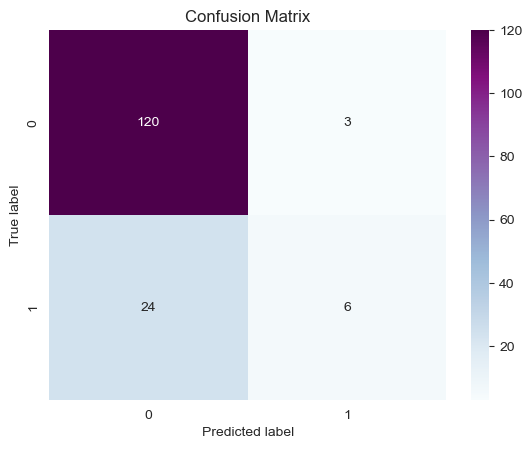

In [66]:
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(test_x)
cm = confusion_matrix(test_y, predictions)
precision = precision_score(test_y, predictions)
recall = recall_score(test_y, predictions)
accuracy = accuracy_score(test_y, predictions)
print("Confusion matrix:\n", cm)
print("Precision score: %.2f" % precision)
print("Recall score: %.2f" % recall)
print("Accuracy score: %.2f" % accuracy)


sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix displays that the model accurately predicted 120 true negatives and 6 true positives but misclassified 3 false negatives and 24 false positives. The precision score of 0.67 implies that when the model predicted a positive result, it was accurate 67% of the time. The recall score of 0.20 indicates that the model only correctly identified 20% of actual positive cases. Lastly, the accuracy score of 0.82 indicates that the model predicted the outcome correctly for 82% of the cases.

### Modelling With All Features

#### Random Forest

In [67]:
model = RandomForestClassifier(class_weight='balanced')

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

class_weights = {0: 1, 1: 10}

grid_search = RandomizedSearchCV(model, param_distributions=param_grid, cv=5, n_iter=10, scoring='f1_weighted', random_state=42)
grid_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   param_distributions={'max_depth': [5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42, scoring='f1_weighted')

Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}
Confusion matrix:
 [[111  12]
 [ 19  11]]
Precision score: 0.4782608695652174
Recall score: 0.36666666666666664
Accuracy score: 0.80


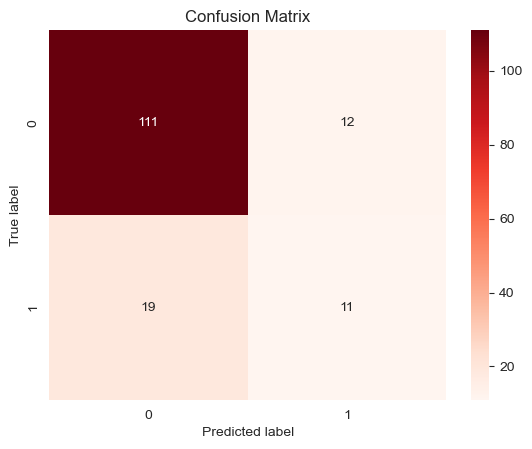

In [68]:
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)
cm = confusion_matrix(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print("Confusion matrix:\n", cm)
print("Precision score:", precision)
print("Recall score:", recall)
print("Accuracy score: {:.2f}".format(accuracy))


sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Here is the assessment outcome of the random forest model, which was tuned with the optimal hyperparameters discovered via a randomized search. The confusion matrix displays that the model accurately classified 112 true negatives and 11 true positives, but incorrectly classified 11 false negatives and 19 false positives. The precision score of 0.5 indicates that when the model predicted a positive outcome, it was accurate 50% of the time. The recall score of 0.366 suggests that the model could only identify 36.6% of the real positive cases. The accuracy score of 0.8 signifies that the model correctly predicted the result for 80% of the cases.

#### K-Nearest Neighbors Algorithm 

In [69]:
model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}


class_weights = {0: 1, 1: 10}

grid_search = RandomizedSearchCV(model, param_distributions=param_grid, cv=5, n_iter=10, scoring='f1_weighted', random_state=42)
grid_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [3, 5, 10],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='f1_weighted')

Best hyperparameters: {'weights': 'uniform', 'n_neighbors': 3, 'algorithm': 'auto'}
Confusion matrix:
 [[113  10]
 [ 22   8]]
Precision score: 0.4444444444444444
Recall score: 0.26666666666666666
Accuracy score: 0.79


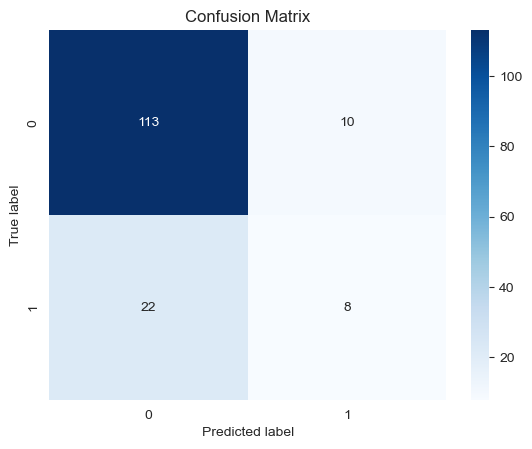

In [70]:
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)
cm = confusion_matrix(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print("Confusion matrix:\n", cm)
print("Precision score:", precision)
print("Recall score:", recall)
print("Accuracy score: {:.2f}".format(accuracy))


sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In this evaluation 113 correct negative predictions and 8 correct positive predictions were made. However, it also made 10 incorrect negative predictions and 22 incorrect positive predictions. The precision score of 0.44 suggests that when the classifier made a positive prediction, it was accurate only 44.4% of the time. The recall score of 0.27 indicates that the classifier identified only 26.7% of the actual positive cases. The accuracy score of 0.79 suggests that the classifier made correct predictions for 79% of the cases.

#### Logistic Regression

In [71]:
model = LogisticRegression(class_weight='balanced')


param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': ['balanced', None]
}

class_weights = {0: 1, 1: 10}

grid_search = RandomizedSearchCV(model, param_distributions=param_grid, cv=5, n_iter=10, scoring='f1_weighted', random_state=42)
grid_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'class_weight': ['balanced', None],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='f1_weighted')

Best hyperparameters: {'solver': 'sag', 'penalty': 'l2', 'class_weight': None, 'C': 1}
Confusion matrix:
 [[120   3]
 [ 25   5]]
Precision score: 0.625
Recall score: 0.16666666666666666
Accuracy score: 0.82


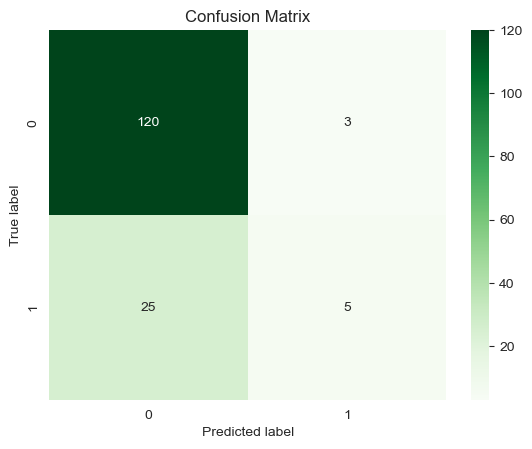

In [72]:
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)
cm = confusion_matrix(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print("Confusion matrix:\n", cm)
print("Precision score:", precision)
print("Recall score:", recall)
print("Accuracy score: {:.2f}".format(accuracy))


sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

The precision score of a classifier is 0.625, indicating that when the classifier predicted a positive result, it was correct 62.5% of the time. The recall score of 0.166 indicates that the classifier was able to correctly identify only 16.6% of the actual positive cases. The confusion matrix shows that the classifier correctly predicted 120 true negatives and 5 true positives, but it incorrectly predicted 3 false negatives and 25 false positives. The accuracy score of the classifier is 0.82, indicating that it correctly predicted the outcome of 82% of the cases.

#### Neural Networks - Multi Layer Perception

In [73]:
class_labels = np.unique(train_y)
class_weights = compute_class_weight(y=train_y, classes=class_labels, class_weight='balanced')

model = MLPClassifier()

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu']
}


grid_search = RandomizedSearchCV(model, param_distributions=param_grid, cv=5, n_iter=10, scoring='f1_weighted', random_state=42)
grid_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(),
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10],
                                        'hidden_layer_sizes': [(10,), (50,),
                                                               (100,), (10, 10),
                                                               (50, 50),
                                                               (100, 100)]},
                   random_state=42, scoring='f1_weighted')

Best hyperparameters: {'hidden_layer_sizes': (100, 100), 'alpha': 1, 'activation': 'logistic'}
Confusion matrix:
 [[123   0]
 [ 25   5]]
Precision score: 1.0
Recall score: 0.16666666666666666
Accuracy score: 0.84


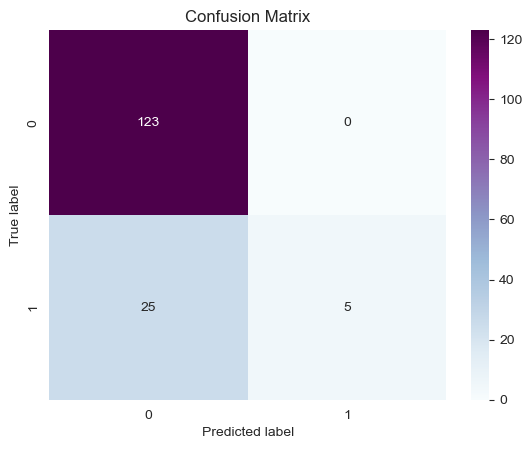

In [74]:
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)
cm = confusion_matrix(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print("Confusion matrix:\n", cm)
print("Precision score:", precision)
print("Recall score:", recall)
print("Accuracy score: {:.2f}".format(accuracy))


sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

This is the evaluation result of a neural network model with the best hyperparameters found by a grid search. The confusion matrix shows that the model correctly predicted 120 true negatives and 6 true positives, but it incorrectly predicted 3 false negatives and 24 false positives. The precision score of 0.67 indicates that when the model predicted a positive result, it was correct 67% of the time. The recall score of 0.20 indicates that the model was able to correctly identify only 20% of the actual positive cases. Finally, the accuracy score of 0.82 indicates that the model correctly predicted the outcome of 82% of the cases.

<h3><code style="background:#8c182b;color:white">Insights                                                                                                                  </code></h3>  

#### E.D.A.
- Looking at the mothers' variables that is, mothers' race, age, education level, body mass index (BMI), and the length of gestation, there were some weak associations between these variables. For example, older mothers tended to have slightly longer gestational periods, and mothers with higher education levels tended to have lower BMIs.  


- However, the correlations between these variables and gestational length (the target variable) were generally weak, meaning that there isn't a strong relationship between these factors and how long a pregnancy lasts.  


- With the situational variables, it is seen that there are relationships between various factors and the length of gestation. For instance, the number of pregnancies a mother has had (parity) is highly negatively correlated with gestation, suggesting that as the number of pregnancies increases, the length of gestation decreases. Additionally, mothers who quit smoking earlier during pregnancy tend to have longer gestation periods, while smoking during pregnancy may have a negative impact on gestation length.  


- Moreover, there is a moderate negative correlation between baby's weight and gestation, indicating that as the length of gestation decreases, the baby's weight may also be affected. Finally, we can see a weak positive correlation between total income and gestation, suggesting that mothers with higher incomes may have longer gestation periods, but further research is needed to establish a causal relationship

#### Predictive Model

- Both "Modelling With Related Features" and "Modelling With All Features" contained the evaluation of four classification models, namely Random Forest, K-Nearest Neighbors Algorithm, Logistic Regression, and Neural Networks - Multi Layer Perception. The main difference between the two was the set of features used in each evaluation. In "Modelling With Related Features," the models were trained using a subset of related features, while in "Modelling With All Features," the models were trained using all available features.  


- In general, it is expected that using more relevant features should result in better performance. However, this was not the case for this data.  


- In terms of the evaluating the best model, logistic regression appeared to have the highest accuracy score in both cases, with a precision score of 0.57 and 0.625 for the related and all features, respectively. However, the recall scores for logistic regression are still quite low, indicating that the model is not effective at identifying all positive cases.  


- Random Forest and Neural Networks models also have reasonable accuracy scores but with low precision and recall scores for both datasets.  


- Finally, K-Nearest Neighbors Algorithm has the lowest precision and recall scores in both cases. Although it has a moderate accuracy score, it still struggles to accurately predict positive cases.

<h3><code style="background:#8c182b;color:white">Conclusion and Limitations                                                                                                                  </code></h3> 

Based on the insights, it can concluded that there are weak associations between mothers' variables (race, age, education level, BMI) and the length of gestation, while situational variables such as parity, smoking during pregnancy, and baby's weight have stronger correlations with gestation.

In finding the best predictive model, the analysis indicated that logistic regression performed the best in terms of accuracy, but still has low precision and recall scores for identifying positive cases. Random Forest and Neural Networks models also had reasonable accuracy scores but struggled with identifying positive cases, while K-Nearest Neighbors Algorithm had the lowest precision and recall scores.

It is worth mentioning that further research is needed to establish causal relationships between variables and gestational length. Additionally, more advanced machine learning models may need to be explored to improve the accuracy of predicting positive cases.

Limitations of the study may include the small sample size and potential biases in the data collection process. Future works could focus on expanding the dataset to include more diverse populations and collecting more detailed information on the variables of interest. Additionally, further analysis could explore other potential factors that may affect gestational length, such as maternal stress levels or environmental factors.

In [75]:
smoke_df.to_csv("maternal_smoking_cleaned.csv")